# An Analysis of Paleo to present Climate Change Data

<details>

<summary> Student Details </summary>

| Student| Details |
| -------- | -------- |
| Course: | KDATG_L08_Y1 |
| Author: | Rebecca Hannah Quinn |
| Student Number: | G00425671 |

</details>

---

## Project Goals

To Analyse CO2 vs Temperature Anomaly for the past 800,000 years to the present day.
To examine the change in the polar-ice coverage alongside this.
To examine the changes in Ireland and Irish climate change signals.

In gathering this information and data I will fuse and analyse the data using pandas dataframes and export the results to csv and json formats.

I will be anaylising the data, the trends, the relationships between them including but not limited to: temporal leads, lags, and frequencies. I will also use synthesised data to predict global temperature anomoly over the next few decades and compare to published models of the same to see if atmospherice CO2 trends continue and comment on the accelerated warming based on the latest features with temperatures polar-ice coverage and ocean and sea levels.


TABLE OF CONTENTS DOES NOT LINK CORRECTLY - CHECK AT END
<details>

<summary> Table of Contents </summary>

[Introduction](#introduction)

[Pre-processing](#pre-processing)

[Data](#data)

[Adjustments](#adjustments)

[Analysis](#analysis)

[Predictions](#predictions)

[References] (#references)

</details>

---


## Introduction

There have been studies on the Earth"s climate that have resulted in data as far back as 800,000 years by extracting core samples from deep beneath the ice sheets of Greenland and Antarctica. These samples contain detailed information on air temperature and CO2 levels that are trapped within them. Current polar records demonstrate a close association between atmospheric carbon dioxide and temperature in the natural world. In essence, when one increases, the other one follows.

However, there is still some uncertainty about which occurred first - a spike in temperature or CO2. Until now, the most extensive records to date on a significant change in Earth"s climate came from the EPICA Dome C ice core on the Antarctic Plateau. The data, which covered the end of the last ice age, between 20,000 and 10,000 years ago, indicated that CO2 levels could have lagged behind rising global temperatures by as much as 1,400 years.
[1]: https://www.scientificamerican.com/article/ice-core-data-help-solve/#:~:text=Scientists%20use%20air%20trapped%20in,than%20the%20ice%20surrounding%20them.


## Pre-processing

---


### Import Packages

In [2703]:
#importing packages required for analysis and visualization
import os # for saving csv files to specific folder #1
import requests #2
from io import StringIO #3
import pandas as pd #4
import numpy as np #5
import matplotlib.pyplot as plt #6
import seaborn as sns #7
from sklearn.linear_model import LinearRegression #8

# path to save csv files to
csv_path = "DATA Files"
jpg_path = "PLOTS"

## Reading in the Data - Global Readings

### CO2

---


#### CO2 Data 1 - NCEI 1855 - 1960

In [2704]:
epica1col = ["year", "co2", "sigma"] #naming the columns for later merges/clarity
epica8kyr1 = pd.read_excel("https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2.xls", sheet_name="CO2 Composite", skiprows=59, names=epica1col)
epica8kyr1["year"] = epica8kyr1["year"].astype(int)

# The code below flips the sign of the "year" values and adds 1950 to them. 
# This is for converting the "year" values to a specific reference point: the year 1950. 

epica8kyr1["year"] = -1 * epica8kyr1["year"] + 1950
epica8kyr1 = epica8kyr1.sort_values(by="year", ascending=False)

os.makedirs(csv_path, exist_ok=True) #creates a directory and saves the processed data as a CSV file.

csvfolder = os.path.join(csv_path, "epica8kyr1.csv")
epica8kyr1.to_csv(csvfolder, index=False)

#### CO2 Data 2 - Global Monitoring Laboratory - 1959 - 2023

In [2705]:
epica2col = ["year", "co2", "unc"]
epica8kyr2 = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv", skiprows=44, sep=",", names=epica2col)
#9
os.makedirs(csv_path, exist_ok=True)

csvfolder = os.path.join(csv_path, "epica8kyr2.csv")
epica8kyr2.to_csv(csvfolder, index=False)

#### CO2 Data 3 - Mauna Lon Observeratory - 1984 - 2023

In [2706]:
epica3col = ["year", "co2", "unc"]
url3 = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt" #10
response = requests.get(url3)
if response.status_code == 200:
    text = response.text
    epica8kyr3 = pd.read_fwf(StringIO(text), names=epica3col, skiprows=45, header=0)
    epica8kyr3 = epica8kyr3.sort_values(by="year", ascending=False)  #values sorted/corrected

os.makedirs(csv_path, exist_ok=True)

csvfolder = os.path.join(csv_path, "epica8kyr3.csv")
epica8kyr3.to_csv(csvfolder, index=False)

##### Initial Analysis

###### Epica CO2 Data 1

In [2707]:
epica8kyr1.head() # head function to check first data lines 11, 12, 13, 14, 15, 16

,year,co2,sigma
0,1960,318.206580,1.723064
1,1960,313.093388,1.812521
2,1959,311.983892,1.812519
4,1958,316.101403,1.723061
3,1958,316.334020,0.941400


In [2708]:
epica8kyr1.tail() #tail function to check end of dataset - is used later through out to test code and may be removed at points

,year,co2,sigma
1851,-801975,202.921723,2.064488
1852,-802059,207.498645,0.915083
1853,-802572,204.861938,1.642851
1854,-803182,202.226839,0.689587
1855,-803718,207.285440,2.202808


In [2709]:
epica8kyr1.columns # info and columns for merging

Index(['year', 'co2', 'sigma'], dtype='object')

In [2710]:
epica8kyr1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1856 entries, 0 to 1855
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1856 non-null   int64  
 1   co2     1856 non-null   float64
 2   sigma   1856 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 58.0 KB


---

###### Epica CO2 Data 2

In [2711]:
epica8kyr2.head()

,year,co2,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


In [2712]:
epica8kyr2.tail()

,year,co2,unc
60,2019,411.65,0.12
61,2020,414.21,0.12
62,2021,416.41,0.12
63,2022,418.53,0.12
64,2023,421.08,0.12


In [2713]:
epica8kyr2.columns

Index(['year', 'co2', 'unc'], dtype='object')

In [2714]:
epica8kyr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    65 non-null     int64  
 1   co2     65 non-null     float64
 2   unc     65 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.7 KB


---

###### Epica CO2 Data 3

In [2715]:
epica8kyr3.head()

,year,co2,unc
NaN,2023,1922.39,0.62
NaN,2022,1911.82,0.78
NaN,2021,1895.26,0.55
NaN,2020,1878.93,0.56
NaN,2019,1866.58,0.60


In [2716]:
epica8kyr3.tail()

,year,co2,unc
NaN,1988,1693.15,0.67
NaN,1987,1682.70,0.49
NaN,1986,1670.09,0.74
NaN,1985,1657.29,0.59
NaN,1984,1644.85,0.67


In [2717]:
epica8kyr3.columns

Index(['year', 'co2', 'unc'], dtype='object')

In [2718]:
epica8kyr3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, nan to nan
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    40 non-null     int64  
 1   co2     40 non-null     float64
 2   unc     40 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


### CH4

---


#### CH4 Data 1

In [2719]:
colnames = ["year", "ch4", "unc"]
noaach4 = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt"

response = requests.get(noaach4)

if response.status_code == 200:
    text = response.text
    noaach4df = pd.read_fwf(StringIO(response.text), names=colnames, widths=[6, 12, 8], skiprows=44, header=0)
    noaach4sort = noaach4df.sort_values(by="year", ascending=True) #joined sets had different sort modes in final data clean
#17, 18, 19
os.makedirs(csv_path, exist_ok=True)

csvfolder = os.path.join(csv_path, "noaach4new.csv")
noaach4sort.to_csv(csvfolder, index=False)

In [2720]:
noaach4sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    40 non-null     int64  
 1   ch4     40 non-null     float64
 2   unc     40 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.1 KB


#### CH4 Data 2

In [2721]:
ch4names = ["year", "ch4"]
ch4data = pd.read_csv("https://climatechange.chicago.gov/sites/production/files/2016-08/ghg-concentrations_fig-2.csv", usecols=[0, 1], skiprows=7, header=0, names=ch4names)
ch4data["year"] = pd.to_numeric(ch4data["year"], errors="coerce") # converts the "year" column to numeric values, with any errors coerced to NaN and ensures data passes through correctly
ch4data = ch4data.dropna(subset=["year"]) 
ch4data["year"] = ch4data["year"].astype(int) #20

os.makedirs(csv_path, exist_ok=True)

csvfolder = os.path.join(csv_path, "ch4data.csv")
ch4data.to_csv(csvfolder, index=False)

In [2722]:
ch4data.info() # check all data came through correctly

<class 'pandas.core.frame.DataFrame'>
Index: 2207 entries, 0 to 2207
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    2207 non-null   int64  
 1   ch4     2103 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 51.7 KB


##### Initial Analysis

##### CH4 DATA 1

In [2723]:
noaach4sort.head()

,year,ch4,unc
0,1984,1644.85,0.67
1,1985,1657.29,0.59
2,1986,1670.09,0.74
3,1987,1682.70,0.49
4,1988,1693.15,0.67


In [2724]:
noaach4sort.tail()

,year,ch4,unc
35,2019,1866.58,0.60
36,2020,1878.93,0.56
37,2021,1895.26,0.55
38,2022,1911.82,0.78
39,2023,1922.39,0.62


In [2725]:
noaach4sort.describe()

,year,ch4,unc
count,40.000000,40.00000,40.000000
mean,2003.500000,1779.66375,0.620000
std,11.690452,66.89836,0.095676
min,1984.000000,1644.85000,0.420000
25%,1993.750000,1740.67750,0.550000
50%,2003.500000,1774.56000,0.630000
75%,2013.250000,1815.70000,0.680000
max,2023.000000,1922.39000,0.820000


In [2726]:
noaach4sort.columns

Index(['year', 'ch4', 'unc'], dtype='object')

##### CH4 DATA 2

In [2727]:
ch4data.head()

,year,ch4
0,-797446,399.3
1,-796467,457.8
2,-795327,396.1
3,-794369,418.0
4,-792988,428.3


In [2728]:
ch4data.tail()

,year,ch4
2203,2011,NaN
2204,2012,NaN
2205,2013,NaN
2206,2014,NaN
2207,2015,NaN


In [2729]:
ch4data.describe()

,year,ch4
count,2207.000000,2103.000000
mean,-256194.044857,519.952278
std,244220.615987,88.056229
min,-797446.000000,342.400000
25%,-417824.500000,449.850000
50%,-203931.000000,508.666667
75%,-33459.500000,589.395389
max,2015.000000,907.000000


In [2730]:
ch4data.columns

Index(['year', 'ch4'], dtype='object')

### Temperature

---


#### Temperature Data 1

In [2731]:
epicadeut = "https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt"
#21
response = requests.get(epicadeut)

if response.status_code == 200:
    text = response.text
    epicadeutdf = pd.read_csv(StringIO(text), sep="\s+", skiprows=89, header=0)
    epicadeutdf.rename(columns={"Age": "year"}, inplace=True)
    epicadeutdf.rename(columns={"Temperature": "temp"}, inplace=True)
    epicadeutdf["year"] = epicadeutdf["year"].astype(int)
    epicadeutdf["year"] = -1 * epicadeutdf["year"] + 1950 #corrects the years as previously
    epicadeutdf["temp"] = epicadeutdf["temp"] + (-54.5) #baseline adjustment to reference all temp data with.
    
    epicacols = epicadeutdf.iloc[:, [2, 4]]#22

os.makedirs(csv_path, exist_ok=True) #23

csvfolder = os.path.join(csv_path, "epicadeut.csv")
epicacols.to_csv(csvfolder, index=False)

#### Temperature Data 2

In [2732]:
noaanames=["year", "temp"]
noaatemp = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/antarctic/land_ocean/12/11/1850-2023/data.csv", skiprows=5, names=noaanames, header=0)
#24
noaatemp["temp"] = pd.to_numeric(noaatemp["temp"], errors="coerce")
noaatemp["temp"] = noaatemp["temp"] + (-54.5) #baseline 25
noaasort = noaatemp.sort_values(by="year", ascending=False)

os.makedirs(csv_path, exist_ok=True)

csvfolder = os.path.join(csv_path, "noaatemp.csv")
noaasort.to_csv(csvfolder, index=False)

##### Initital Analysis

In [2733]:
epicacols.head()

,year,temp
0,2000,NaN
1,1993,NaN
2,1987,NaN
3,1981,NaN
4,1974,NaN


In [2734]:
epicacols.tail()

,year,temp
5795,-795458,-63.23
5796,-796493,-63.04
5797,-797551,-63.38
5798,-798639,-63.42
5799,-799712,-63.32


In [2735]:
epicacols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    5800 non-null   int64  
 1   temp    5785 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 90.8 KB


In [2736]:
epicacols.describe()

,year,temp
count,5800.000000,5785.000000
mean,-188065.971207,-59.080228
std,192546.358262,3.446971
min,-799712.000000,-65.080000
25%,-270506.250000,-61.950000
50%,-119843.000000,-59.700000
75%,-44380.000000,-56.320000
max,2000.000000,-49.040000


In [2737]:
epicacols.columns

Index(['year', 'temp'], dtype='object')

---

In [2738]:
noaasort.head()

,year,temp
171,2023,-54.31
170,2022,-54.15
169,2021,-54.43
168,2020,-54.06
167,2019,-54.24


In [2739]:
noaasort.tail()

,year,temp
4,1856,-54.46
3,1855,-54.41
2,1854,-54.49
1,1853,-54.49
0,1852,-54.49


In [2740]:
noaasort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 171 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    172 non-null    int64  
 1   temp    172 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB


In [2741]:
noaasort.describe()

,year,temp
count,172.000000,172.000000
mean,1937.500000,-54.456221
std,49.796252,0.188937
min,1852.000000,-55.050000
25%,1894.750000,-54.560000
50%,1937.500000,-54.460000
75%,1980.250000,-54.370000
max,2023.000000,-53.870000


In [2742]:
noaasort.columns

Index(['year', 'temp'], dtype='object')

### Initial Data Adjustments

---

##### CO2 - Merge Data

In [2743]:
mergeddata = pd.merge(epica8kyr3, epica8kyr2, on=["year", "co2", "unc"], how="outer") #26
mergeddata = pd.merge(mergeddata, epica8kyr1, on=["year", "co2"], how="outer") #outer ensures that all records from both DataFrames are included
mergeddata.drop(columns=["unc", "sigma"], inplace=True) #remove columns not required for this analysis

os.makedirs(csv_path, exist_ok=True)

csvfolder = os.path.join(csv_path, "mergedco2data.csv")
mergeddata.to_csv(csvfolder, index=False)

mergeddata.columns # check columns merged correctly

Index(['year', 'co2'], dtype='object')

In [2744]:
mergeddata.head() # remove nan items leave only co2
mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1961 non-null   int64  
 1   co2     1961 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 30.8 KB


##### CH4 - Merge Data

In [2745]:
mergech4 = pd.merge(ch4data, noaach4sort, on=["year", "ch4"], how="outer")
mergech4.drop(columns=["unc"], inplace=True)
mergech4.sort_values(by="year", ascending=False, inplace=True)

os.makedirs(csv_path, exist_ok=True)

csvfolder = os.path.join(csv_path, "mergedch4.csv")
mergech4.to_csv(csvfolder, index=False)

In [2746]:
mergech4.columns

Index(['year', 'ch4'], dtype='object')

In [2747]:
mergech4.head()

,year,ch4
2246,2023,1922.39
2245,2022,1911.82
2244,2021,1895.26
2243,2020,1878.93
2242,2019,1866.58


In [2748]:
mergech4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2247 entries, 2246 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    2247 non-null   int64  
 1   ch4     2143 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 52.7 KB


##### Temperature - Merge Data

In [2749]:
mergetemp = pd.merge(noaasort, epicacols, on=["year", "temp"], how="outer")

os.makedirs(csv_path, exist_ok=True)

csvfolder = os.path.join(csv_path, "tempsmerge.csv")
mergetemp.to_csv(csvfolder, index=False)

In [2750]:
mergetemp.columns

Index(['year', 'temp'], dtype='object')

In [2751]:
mergetemp.head()

,year,temp
0,2023,-54.31
1,2022,-54.15
2,2021,-54.43
3,2020,-54.06
4,2019,-54.24


In [2752]:
mergetemp.shape # check the merge went correctly
mergetemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5971 entries, 0 to 5970
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    5971 non-null   int64  
 1   temp    5956 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 93.4 KB


## Final Dataframe

In [2753]:
co2datafinal = pd.read_csv("DATA Files/mergedco2data.csv")
ch4datafinal = pd.read_csv("DATA Files/mergedch4.csv")
tempdatafinal = pd.read_csv("DATA Files/tempsmerge.csv")

# Merge CO2 and CH4 data on "year"
finalmerge = pd.merge(co2datafinal, ch4datafinal, on="year", how="outer", suffixes=("_co2", "_ch4"))

# Merge the result with temperature data on "year"
finalmerge = pd.merge(finalmerge, tempdatafinal, on="year", how="outer")
finalmerge.drop_duplicates(subset="year", keep="first", inplace=True)

os.makedirs(csv_path, exist_ok=True)

csvfolder = os.path.join(csv_path, "finaldataframe.csv")
finalmerge.to_csv(csvfolder, index=False)

finalmerge.head() #check full dataframe created

,year,co2,ch4,temp
0,2023,1922.39,1922.39,-54.31
2,2022,1911.82,1911.82,-54.15
4,2021,1895.26,1895.26,-54.43
6,2020,1878.93,1878.93,-54.06
8,2019,1866.58,1866.58,-54.24


### Statistical Measurement

---

Statistical measurements help us under stand the basics of the data before visual representations are examined. They can help determine the accuracy and direction of plots. For instance, the mean and median reveal the central tendency of the data, while the standard deviation illustrates the variability. Additionally, correlation measurements indicate the relationship between two variables.

In [2754]:
#27, 28

### CO2

In [2755]:
mean_value = mergeddata["co2"].mean()
print(f"CO2 Data Mean Value: {mean_value}")

median_value = mergeddata["co2"].median()
print(f"CO2 Data Median Value: {median_value}")

std_deviation = mergeddata["co2"].std()
print(f"CO2 Data Standard Deviation: {std_deviation}")

correlation = mergeddata["co2"].corr(mergeddata["year"])
print(f"CO2 Data Standard Deviation: {correlation}")

CO2 Data Mean Value: 268.89035809718195
CO2 Data Median Value: 233.9
CO2 Data Standard Deviation: 221.7995401215831
CO2 Data Standard Deviation: 0.16570861312601526


### CH4

In [2756]:
mean_value = mergech4["ch4"].mean()
print(f"CH4 Data Mean Value: {mean_value}")

median_value = mergech4["ch4"].median()
print(f"CH4 Data Median Value: {median_value}")

std_deviation = mergech4["ch4"].std()
print(f"CH4 Data Standard Deviation: {std_deviation}")

correlation = mergech4["ch4"].corr(mergech4["year"])
print(f"CH4 Data Standard Deviation: {correlation}")

CH4 Data Mean Value: 543.4653250864209
CH4 Data Median Value: 512.3
CH4 Data Standard Deviation: 191.75752354080458
CH4 Data Standard Deviation: 0.14482158527671696


### TEMPERATURE

In [2757]:
mean_value = mergetemp["temp"].mean()
print(f"Temp Data Mean Value: {mean_value}")

median_value = mergetemp["temp"].median()
print(f"Temp Data Median Value: {median_value}")

std_deviation = mergetemp["temp"].std()
print(f"Temp Data Standard Deviation: {std_deviation}")

correlation = mergetemp["temp"].corr(mergetemp["year"])
print(f"Temp Data Standard Deviation: {correlation}")

Temp Data Mean Value: -58.947471457353934
Temp Data Median Value: -59.57
Temp Data Standard Deviation: 3.4839328057749537
Temp Data Standard Deviation: 0.025290533103473754


## Irish Context

---


### Temperature

In [2758]:
#yearly averages temp ireland #29
# Step 1: Load the CSV file
glasnevin1823 = pd.read_csv("DATA Files/dly1823.csv", delimiter=",", header=10, skiprows=list(range(17, 7320)))

# Step 2: Convert the "date" column to datetime format and extract the year
glasnevin1823["date"] = pd.to_datetime(glasnevin1823["date"], errors="coerce")
glasnevin1823["year"] = glasnevin1823["date"].dt.year

# Ensure "maxt" and "mint" columns are numeric
glasnevin1823["maxt"] = pd.to_numeric(glasnevin1823["maxt"], errors="coerce")
glasnevin1823["mint"] = pd.to_numeric(glasnevin1823["mint"], errors="coerce")

# Step 3: Group by "year" and calculate the mean of "maxt" and "mint" for each year
yearly_avg1 = glasnevin1823.groupby("year").agg({
    "maxt": "mean",
    "mint": "mean"
}).reset_index()
#29, 30
# Drop any rows with missing data if necessary
yearly_avg1.dropna(inplace=True)


/var/folders/bn/xqdgg_35477_8nvxrj84pj300000gn/T/ipykernel_76848/3373081322.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  glasnevin1823["date"] = pd.to_datetime(glasnevin1823["date"], errors="coerce")


In [2759]:
os.makedirs(csv_path, exist_ok=True)

csvfolder = os.path.join(csv_path, "tempire_yearlyavg.csv")
yearly_avg1.to_csv(csvfolder, index=False)

yearly_avg1.head()

,year,maxt,mint
1,1961,13.884341,6.260440
2,1962,12.527945,5.368767
3,1963,15.247581,7.680645
4,1964,13.408470,6.302186
5,1965,15.543103,7.276271


In [2760]:
# decade averages

# Step 1: Load the CSV file
glasnevin1823 = pd.read_csv("DATA Files/dly1823.csv", delimiter=",", header=10, skiprows=list(range(17, 7320)))

# Step 2: Convert the "date" column to datetime format and extract the year
# 32 
glasnevin1823["date"] = pd.to_datetime(glasnevin1823["date"], errors="coerce")
glasnevin1823["year"] = glasnevin1823["date"].dt.year

# Ensure "maxt" and "mint" columns are numeric
glasnevin1823["maxt"] = pd.to_numeric(glasnevin1823["maxt"], errors="coerce")
glasnevin1823["mint"] = pd.to_numeric(glasnevin1823["mint"], errors="coerce")

# Step 3: Group by "year" and calculate the mean of "maxt" and "mint" for each year
yearly_avg2 = glasnevin1823.groupby("year").agg({
    "maxt": "mean",
    "mint": "mean"
}).reset_index()

# Drop any rows with missing data if necessary
yearly_avg2.dropna(inplace=True)
# 33
# Step 4: Calculate decade averages
yearly_avg2["decade"] = (yearly_avg2["year"] // 10) * 10
decade_avg = yearly_avg2.groupby("decade").agg({
    "maxt": "mean",
    "mint": "mean"
}).reset_index()


/var/folders/bn/xqdgg_35477_8nvxrj84pj300000gn/T/ipykernel_76848/2097172702.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  glasnevin1823["date"] = pd.to_datetime(glasnevin1823["date"], errors="coerce")


In [2761]:
os.makedirs(csv_path, exist_ok=True)

csvfolder = os.path.join(csv_path, "tempire_decadeavg.csv")
decade_avg.to_csv(csvfolder, index=False)

decade_avg.head()

,decade,maxt,mint
0,1960,13.642311,6.273404
1,1970,13.303405,6.620358
2,1980,13.483787,6.606538
3,1990,14.464779,7.332847
4,2000,14.511219,7.839314


### Rainfall

In [2762]:
station108 = pd.read_csv("DATA Files/mly108-foulkesmill1873.csv", delimiter=",")
station108cols = station108[["year", "rain"]] # shows only required columns

os.makedirs(csv_path, exist_ok=True)

csvfolder = os.path.join(csv_path, "rainire_station108.csv")
station108cols.to_csv(csvfolder, index=False)

station108cols.head()
# testing the csv was read correctly

,year,rain
0,1941,161.6
1,1941,120.9
2,1941,81.2
3,1941,33.4
4,1941,68.9


In [2763]:
station1603 = pd.read_csv("DATA Files/mly1603.csv", header=0, delimiter=",", skiprows=13)

In [2764]:
station1603 = station1603.drop(index=range(5)).reset_index(drop=True)

In [2765]:
station1823 = pd.read_csv("DATA Files/mly1823.csv", delimiter=",", skiprows=13)

station1823cols = station1823[["year", "rain"]]

os.makedirs(csv_path, exist_ok=True)

csvfolder = os.path.join(csv_path, "rainire_station1823.csv")
station1823cols.to_csv(csvfolder, index=False)
station1823cols.head()

,year,rain
0,1941,117.1
1,1941,69.2
2,1941,107.3
3,1941,78.1
4,1941,56.8


In [2766]:
station1823.describe() # checking info for errors with rows and delimiter

,year,month,ind,rain
count,998.000000,998.000000,998.000000,998.000000
mean,1982.092184,6.476954,0.024048,61.434569
std,24.033233,3.455545,0.153275,34.478032
min,1941.000000,1.000000,0.000000,3.100000
25%,1961.000000,3.000000,0.000000,36.700000
50%,1982.000000,6.000000,0.000000,55.600000
75%,2003.000000,9.000000,0.000000,81.225000
max,2024.000000,12.000000,1.000000,218.800000


In [2767]:
yearlyrainfall = station108.groupby("year")["rain"].sum().reset_index()

os.makedirs(csv_path, exist_ok=True)

csvfolder = os.path.join(csv_path, "yearlyirerainfall.csv")
yearlyrainfall.to_csv(csvfolder, index=False)
yearlyrainfall.head(14) #testing groubed by worked for each year/month

,year,rain
0,1941,969.5
1,1942,942.8
2,1943,1032.4
3,1944,974.4
4,1945,1023.8
5,1946,1193.1
6,1947,1266.1
7,1948,1157.5
8,1949,752.6
9,1950,1054.7



## Analysis



### Global Plots

#### Plot Overview

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

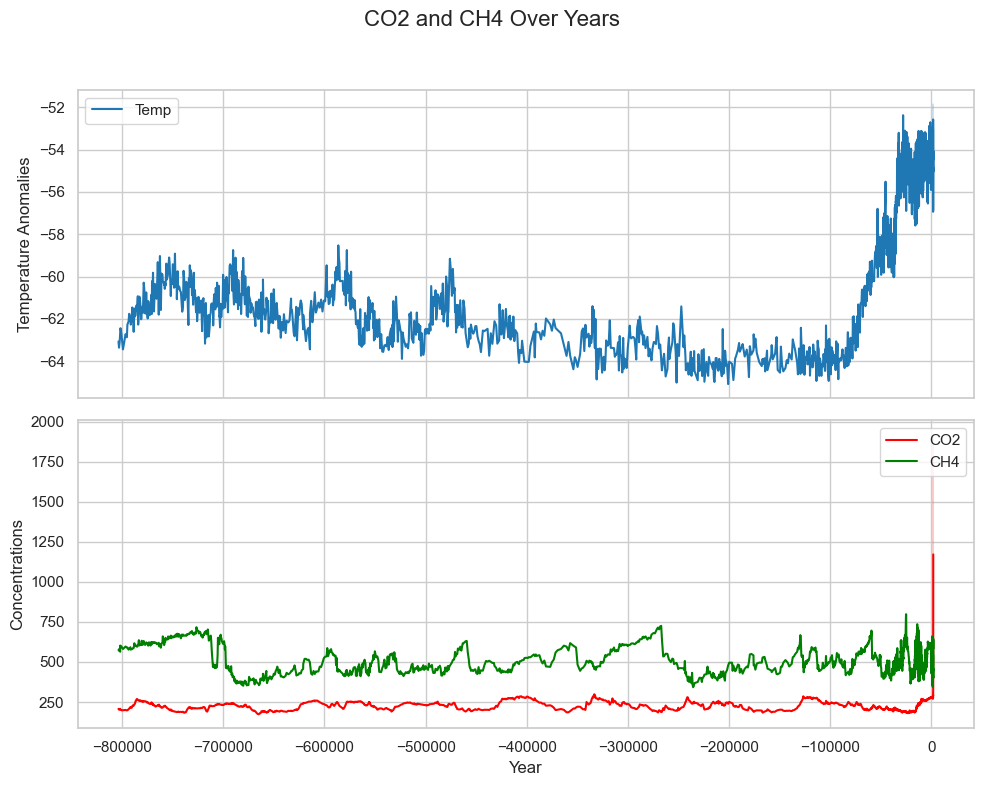

In [2768]:
years = mergeddata["year"]
co2values = mergeddata["co2"]
ch4values = mergech4["ch4"]
tempvalues = mergetemp["temp"]

globaldata_overview = pd.DataFrame({
    "years": years,
    "tempvalues": tempvalues,
    "co2values": co2values,
    "ch4values": ch4values
})
#34
# drop NaN
globaldata_cleaned = globaldata_overview.dropna() 

# create fig/plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# temp plot on ax1
sns.lineplot(x="years", y="tempvalues", data=globaldata_cleaned, ax=ax1, label="Temp")
ax1.set_ylabel("Temperature Anomalies")
ax1.legend()

# CO2/CH4 on ax2
sns.lineplot(x="years", y="co2values", data=globaldata_cleaned, ax=ax2, label="CO2", color="r")
sns.lineplot(x="years", y="ch4values", data=globaldata_cleaned, ax=ax2, label="CH4", color="g")
ax2.set_ylabel("Concentrations")
ax2.legend()

# title
fig.suptitle("CO2 and CH4 Over Years", fontsize=16)
ax2.set_xlabel("Year")

# layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for the suptitle

# show/save fig plot to folder via path

os.makedirs(jpg_path, exist_ok=True)

image_path = os.path.join(jpg_path, "ch4co2_overview.jpg")
plt.savefig(image_path)
plt.show()

### CO2 - Plots

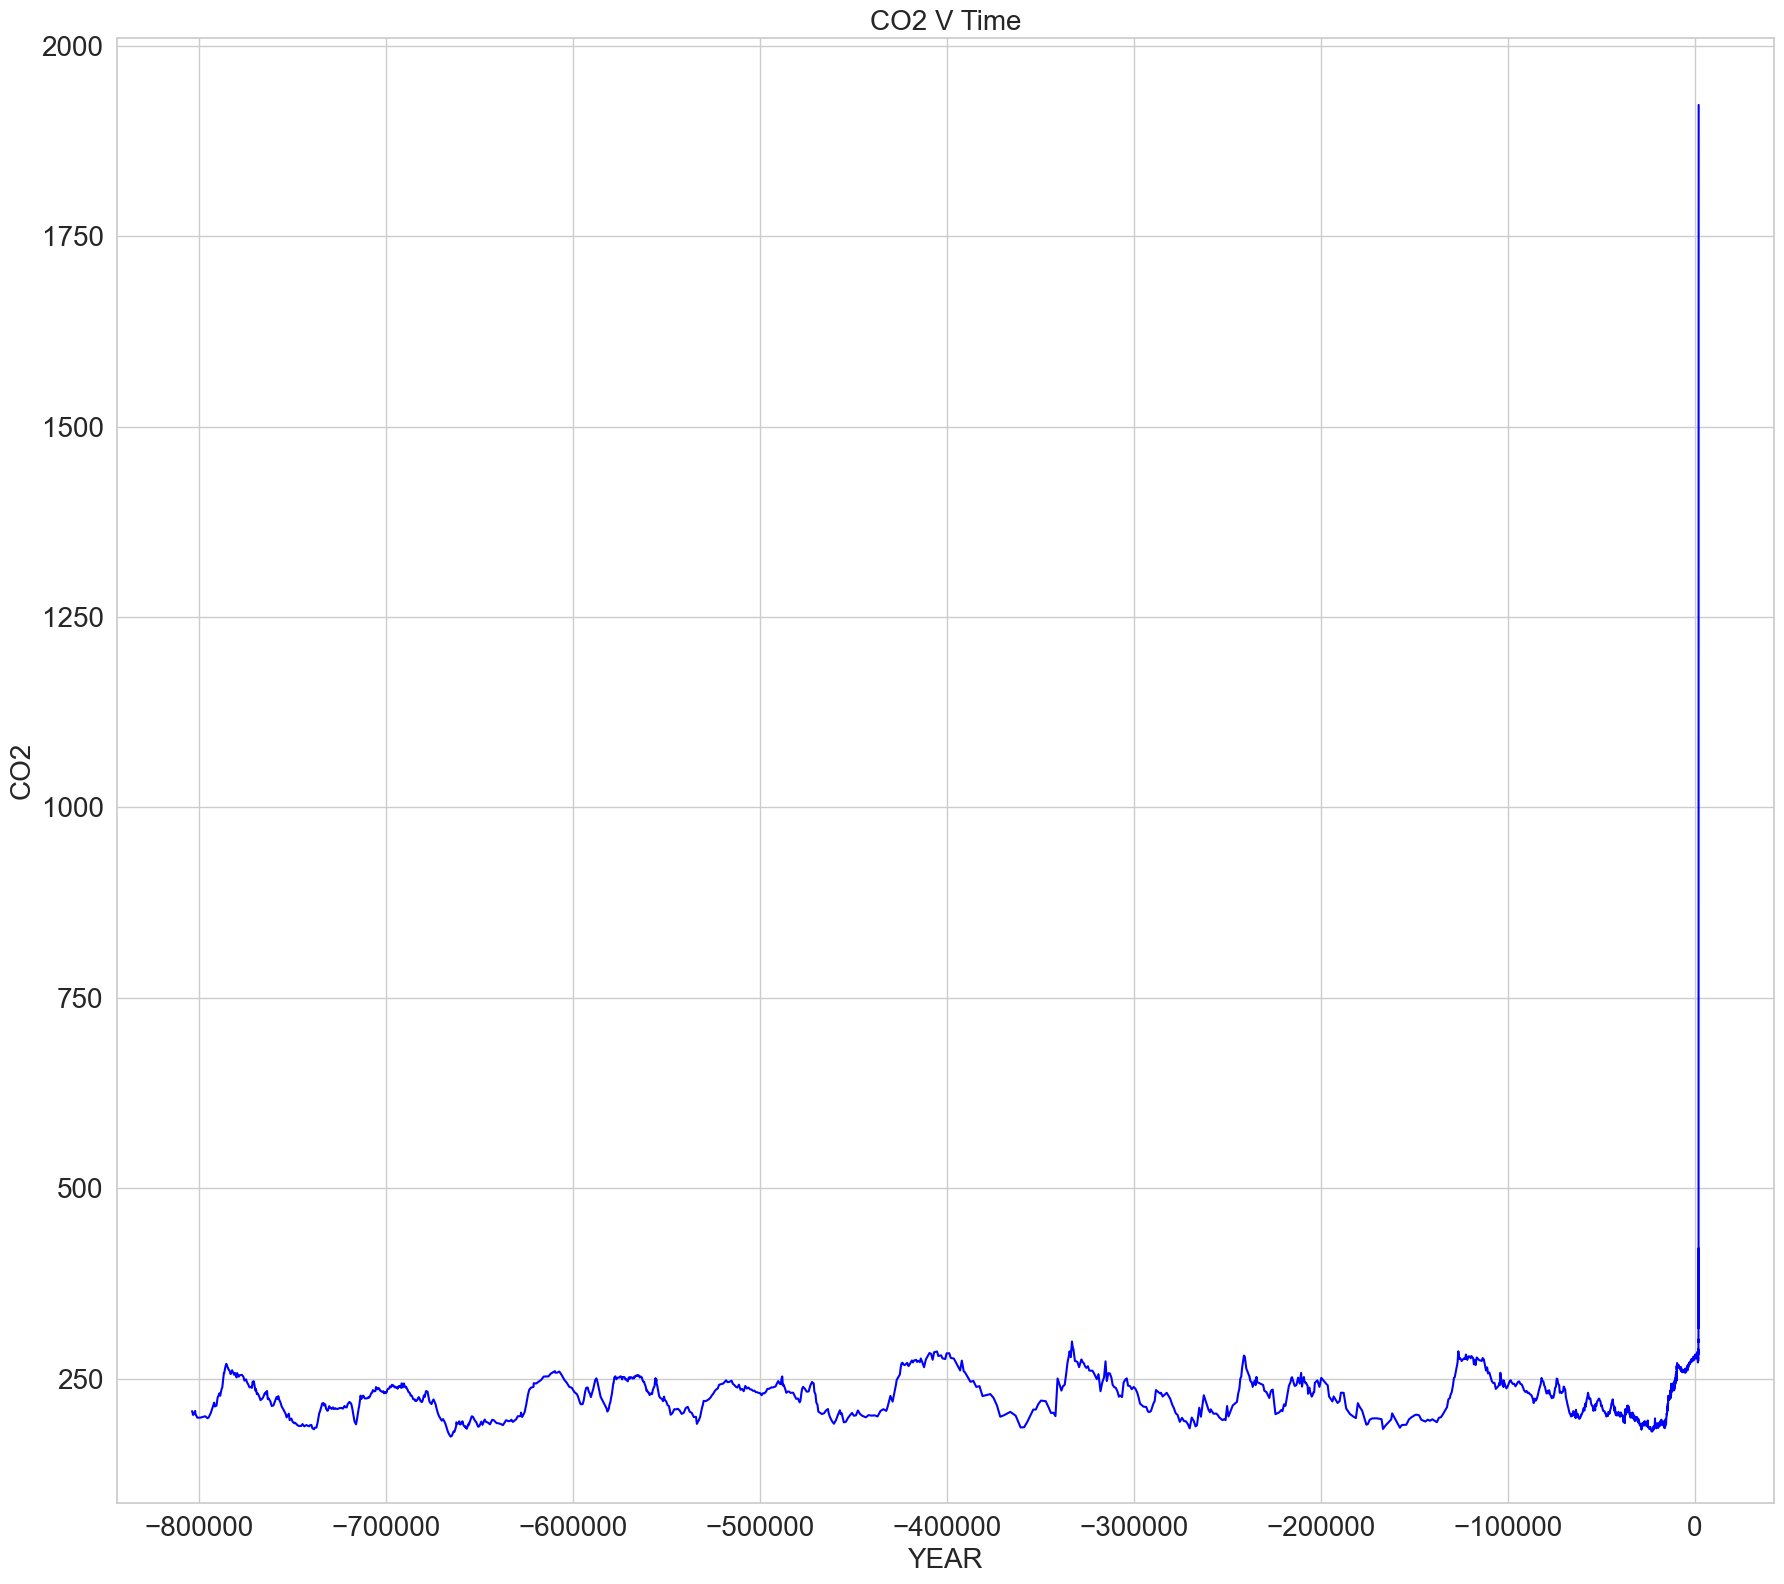

In [2769]:
plt.figure(figsize=(18, 16))
plt.plot(mergeddata["year"], mergeddata["co2"], color="blue")
plt.xlabel("YEAR", fontsize=20)
plt.ylabel("CO2", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("CO2 V Time", fontsize=20)
plt.tight_layout()

# show/save fig plot to folder via path

os.makedirs(jpg_path, exist_ok=True)

image_path = os.path.join(jpg_path, "lineplot1.jpg")
plt.savefig(image_path)

# styles
sns.set_style("whitegrid")
sns.set_context("paper") 

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

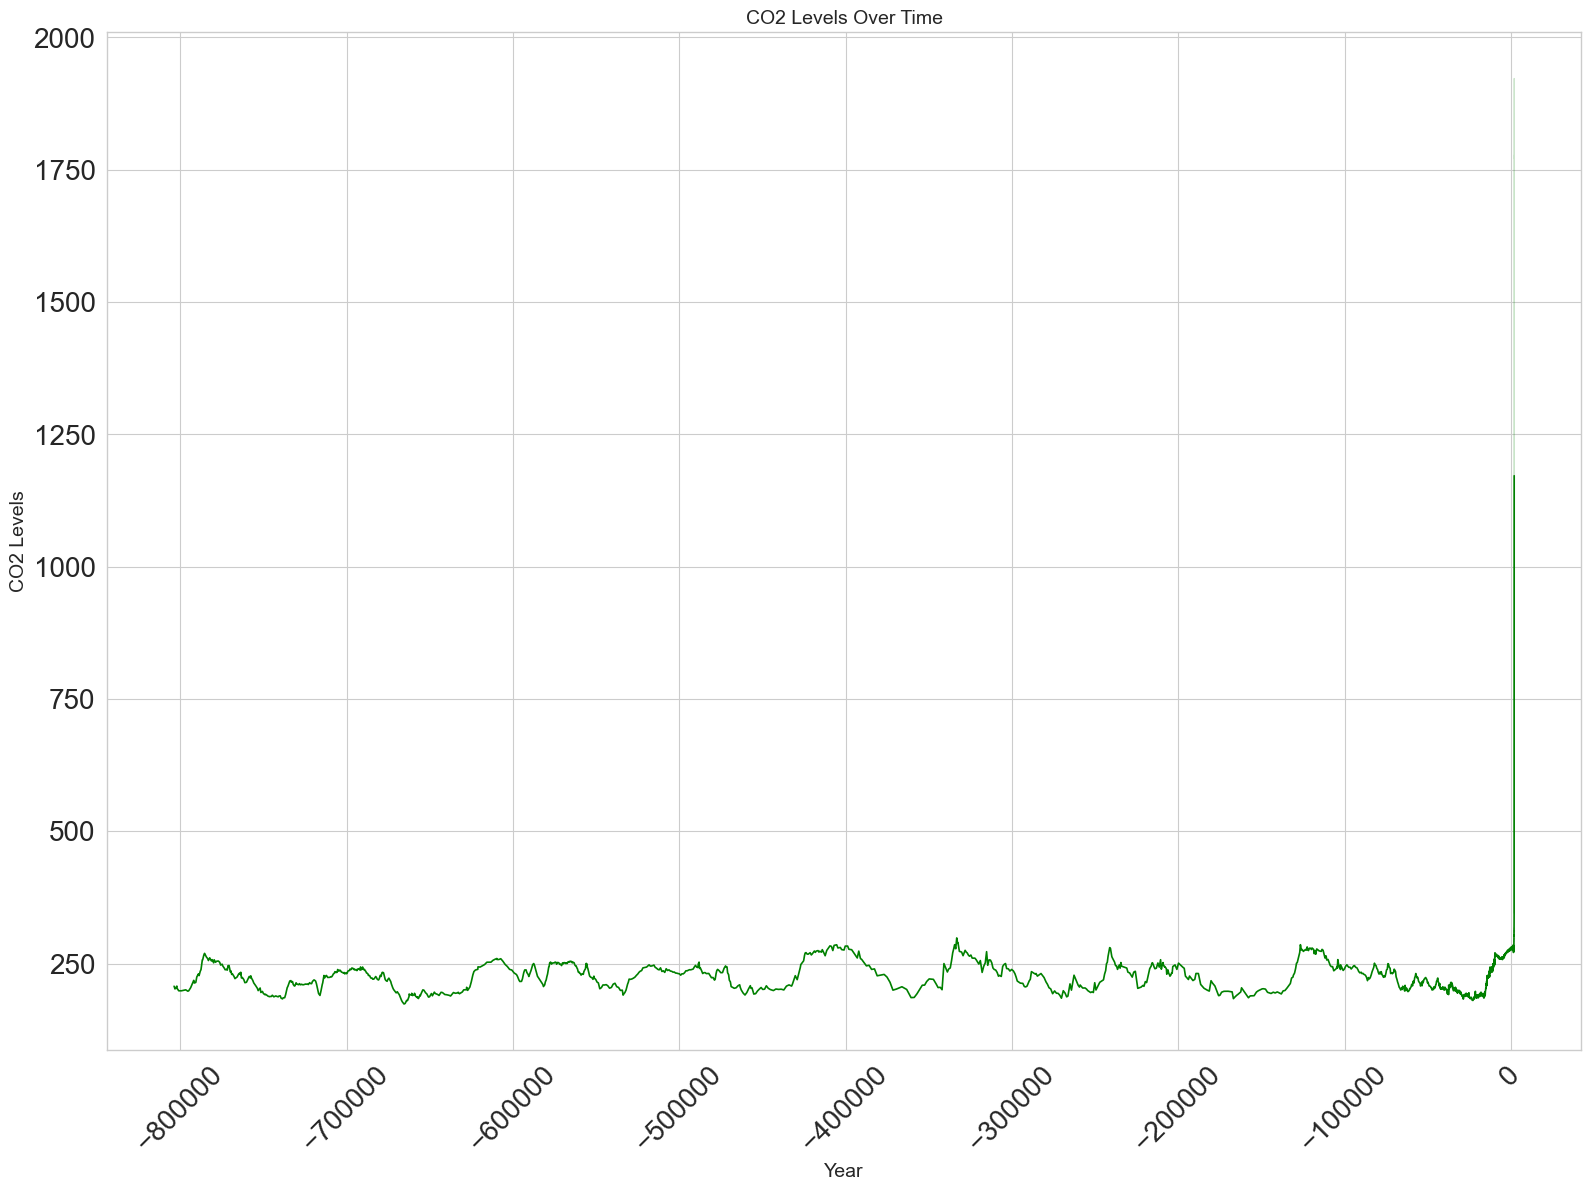

In [2770]:
plt.figure(figsize=(16, 12))

# lineplot
sns.lineplot(data=mergeddata, x="year", y="co2", color="green")

# labels
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 Levels", fontsize=14)
plt.title("CO2 Levels Over Time", fontsize=14)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)


plt.tight_layout()  # spacing
# show/save fig plot to folder via path

os.makedirs(jpg_path, exist_ok=True)

image_path = os.path.join(jpg_path, "snslineplotnew.png")
plt.savefig(image_path)

### CH4 - Plots

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

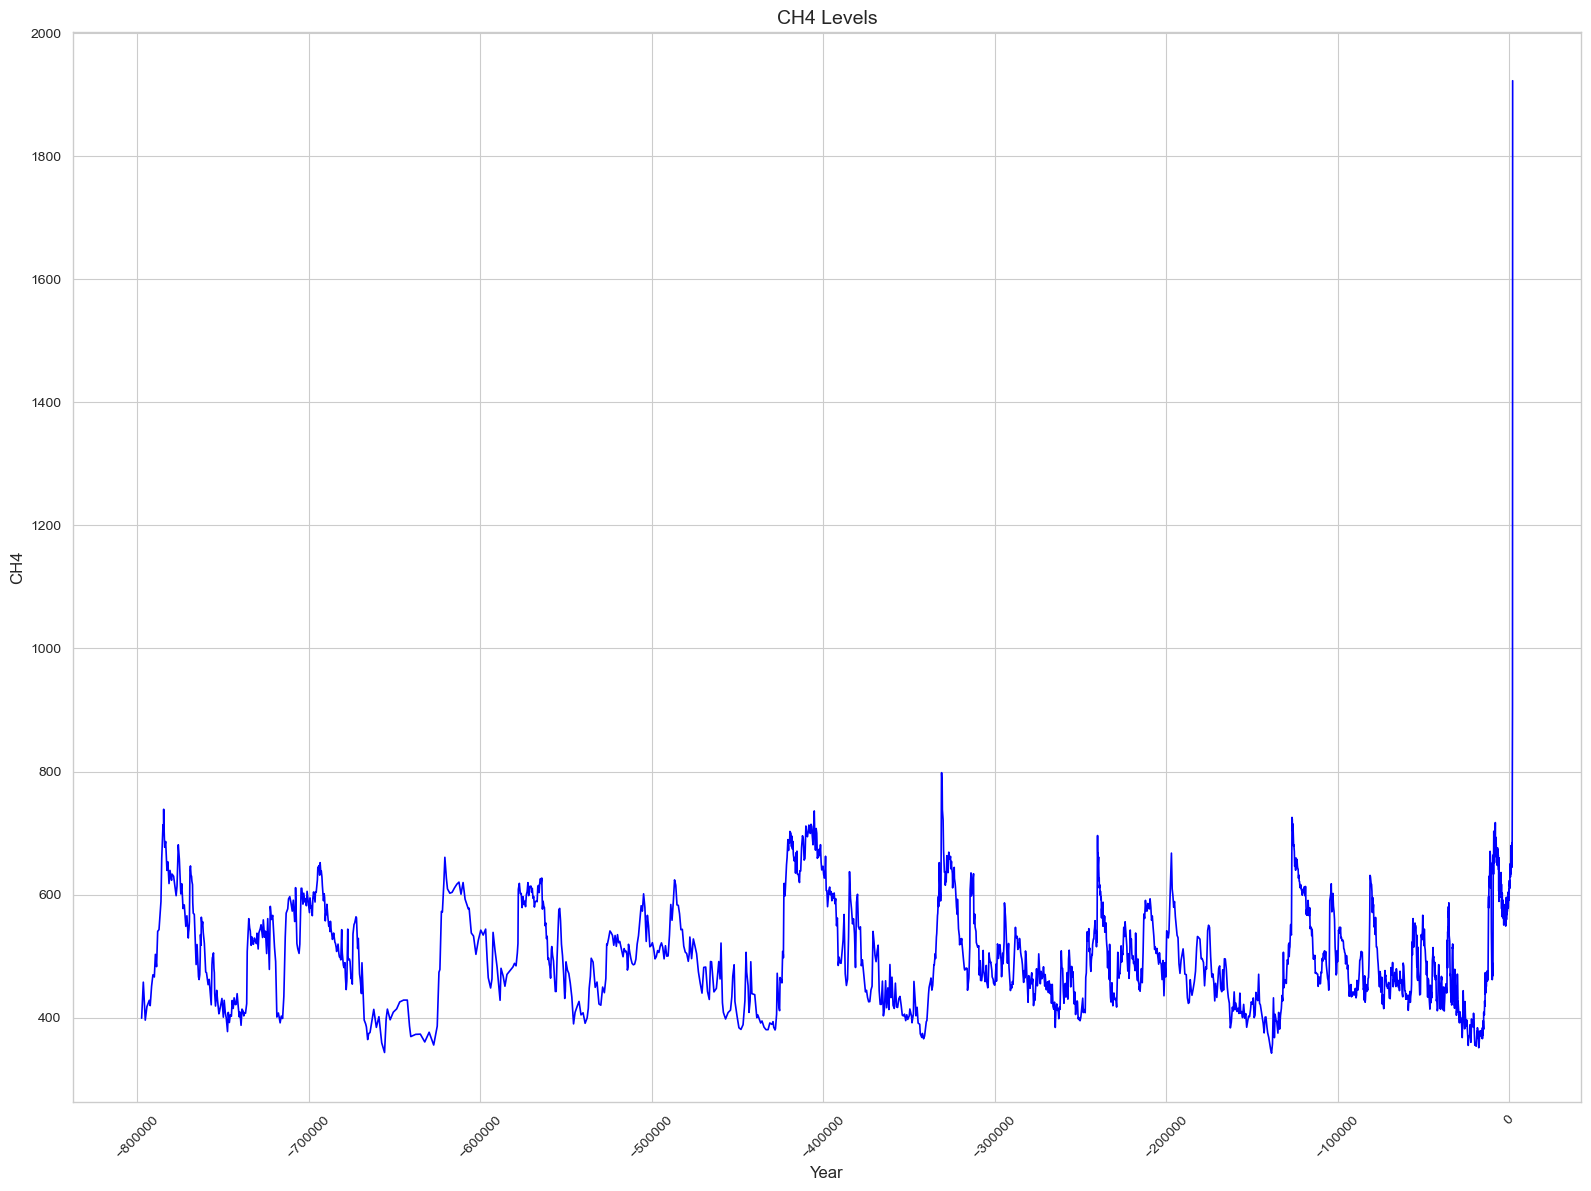

In [2771]:
# style
sns.set_style("whitegrid")
sns.set_context("paper")

# size
plt.figure(figsize=(16, 12))

# lineplot
sns.lineplot(data=mergech4, x="year", y="ch4", color="blue")

# labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("CH4", fontsize=12)
plt.title("CH4 Levels", fontsize=14)
plt.xticks(rotation=45)

# ticks spacing
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()  # additional spacing
os.makedirs(jpg_path, exist_ok=True)

image_path = os.path.join(jpg_path, "ch4levels2.png")
plt.savefig(image_path)

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

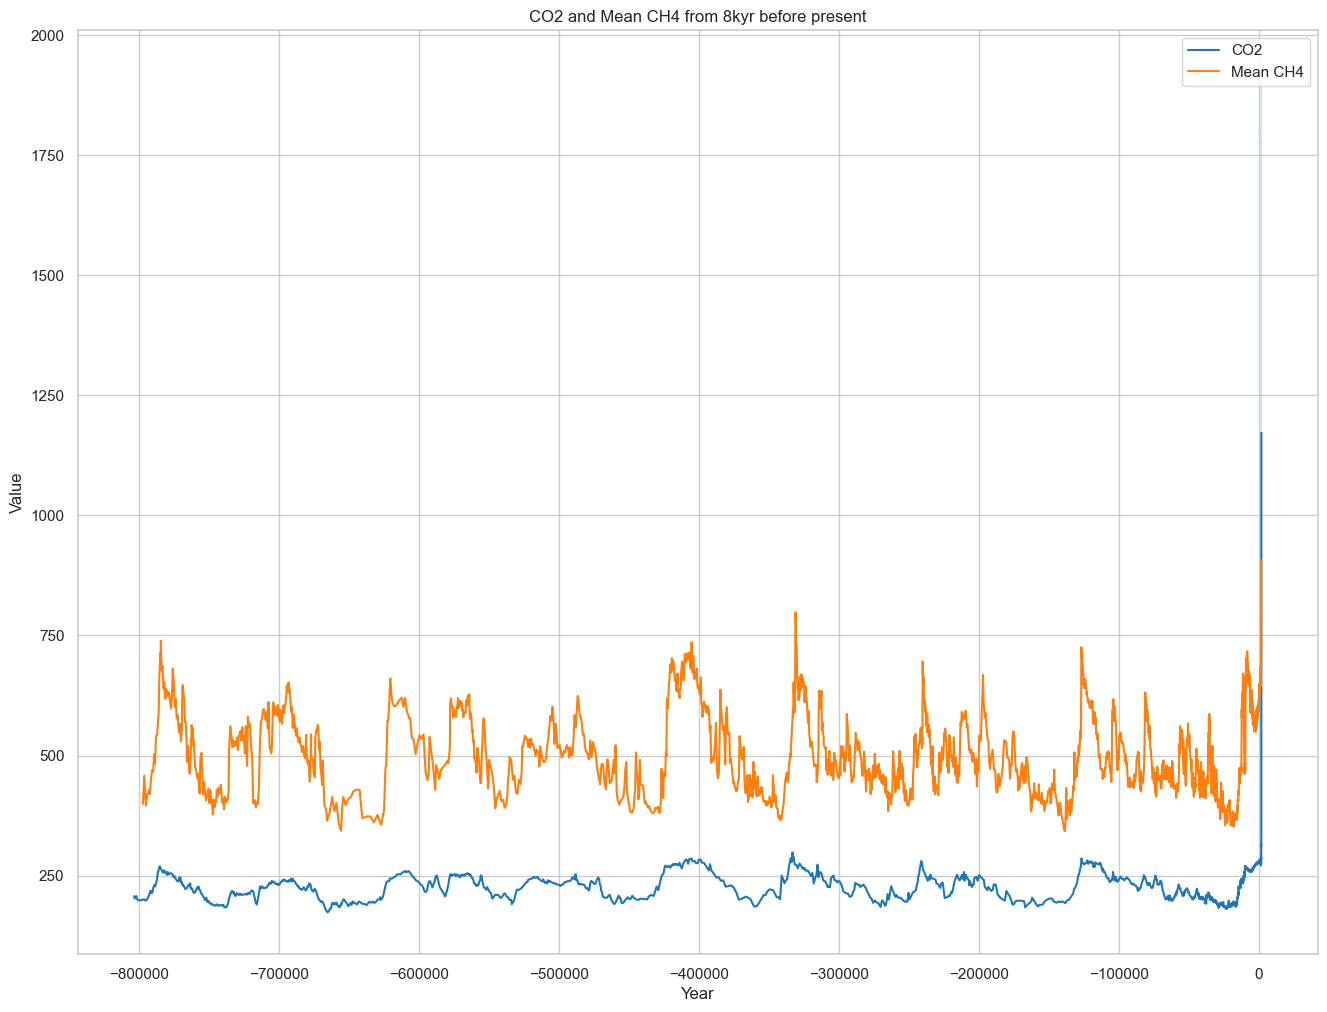

In [2772]:
plt.figure(figsize=(16, 12))
# selection of data for demonstration

sns.set_style("whitegrid")
sns.set_context("notebook")

sns.lineplot(data=mergeddata, x="year", y="co2", label="CO2")
sns.lineplot(data=ch4data, x="year", y="ch4", label="Mean CH4")

plt.title("CO2 and Mean CH4 from 8kyr before present")
plt.xlabel("Year")
plt.ylabel("Value")

plt.legend()

os.makedirs(jpg_path, exist_ok=True)

image_path = os.path.join(jpg_path, "CO2CH4mean8kyr.jpg")
plt.savefig(image_path)
plt.show()

You can see here the relationship between CO2 and CH4 is close as when one rises so does the other. Although not exact, it does show that one will rise at the same time as the other.

## Irish Context - Plots

### Temperature - Plots

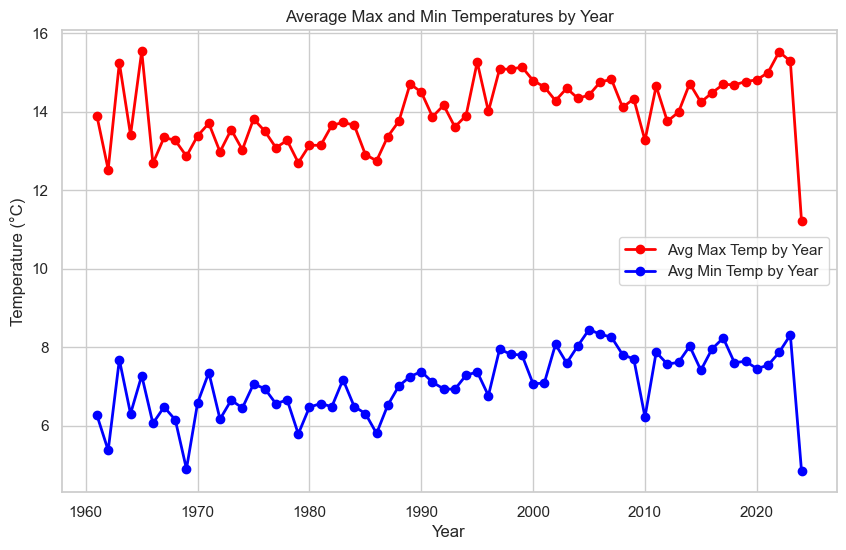

In [2773]:
# yearly average
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg1["year"], yearly_avg1["maxt"], label="Avg Max Temp by Year", color="r", marker="o", linewidth=2)
plt.plot(yearly_avg1["year"], yearly_avg1["mint"], label="Avg Min Temp by Year", color="b", marker="o", linewidth=2)

# adding labels, title, and grid
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Average Max and Min Temperatures by Year")
plt.legend()
plt.grid(True)

# show/save the plot
os.makedirs(jpg_path, exist_ok=True)

image_path = os.path.join(jpg_path, "irishtemperatures_yearly_avg.jpg")
plt.savefig(image_path)
plt.show()

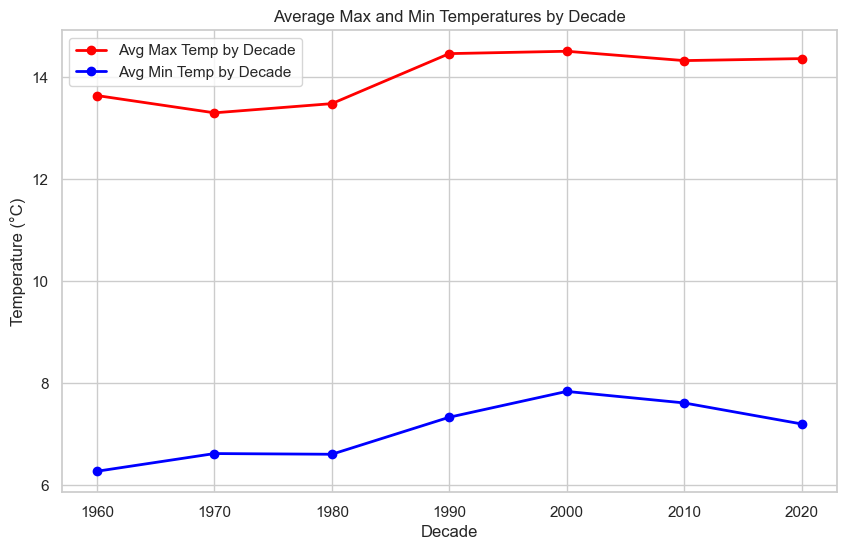

In [2774]:
plt.figure(figsize=(10, 6))
plt.plot(decade_avg["decade"], decade_avg["maxt"], label="Avg Max Temp by Decade", color="r", marker="o", linewidth=2)
plt.plot(decade_avg["decade"], decade_avg["mint"], label="Avg Min Temp by Decade", color="b", marker="o", linewidth=2)

# labels, title, and grid
plt.xlabel("Decade")
plt.ylabel("Temperature (°C)")
plt.title("Average Max and Min Temperatures by Decade")
plt.legend()
plt.grid(True)

# show/save plot
os.makedirs(jpg_path, exist_ok=True)

image_path = os.path.join(jpg_path, "irishtemperatures_decade_avg.jpg")
plt.savefig(image_path)
plt.show()

### Rainfall - Plots

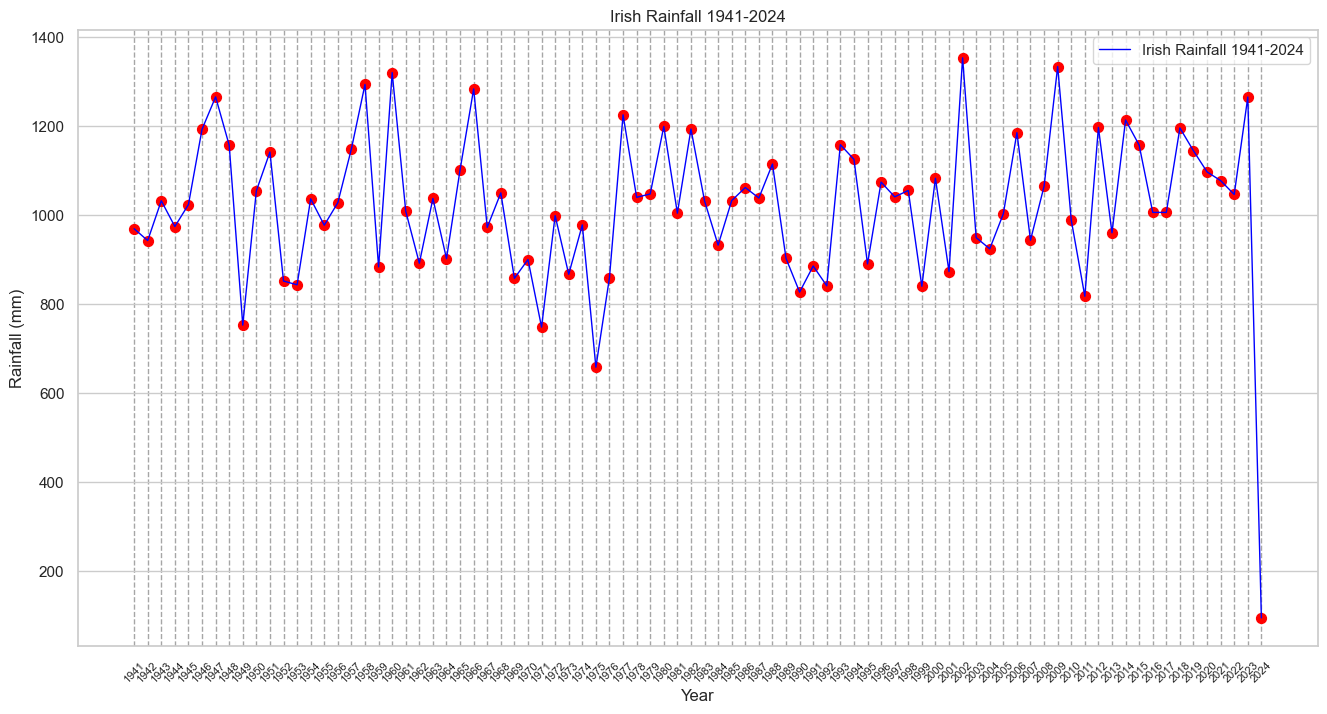

In [2775]:
plt.figure(figsize=(16, 8))

plt.plot(yearlyrainfall["year"], yearlyrainfall["rain"], label="Irish Rainfall 1941-2024", color="blue", linewidth=1)
plt.scatter(yearlyrainfall["year"], yearlyrainfall["rain"], color="red", edgecolor="red", s=50, marker="o")

plt.xticks(yearlyrainfall["year"], rotation=45, fontsize=8)

plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Irish Rainfall 1941-2024")
plt.grid(axis="x", linestyle="--", color="gray", alpha=0.7)

plt.legend()

# show/save plot
os.makedirs(jpg_path, exist_ok=True)

image_path = os.path.join(jpg_path, "irishyearlyrainfall.jpg")
plt.savefig(image_path)
plt.show()

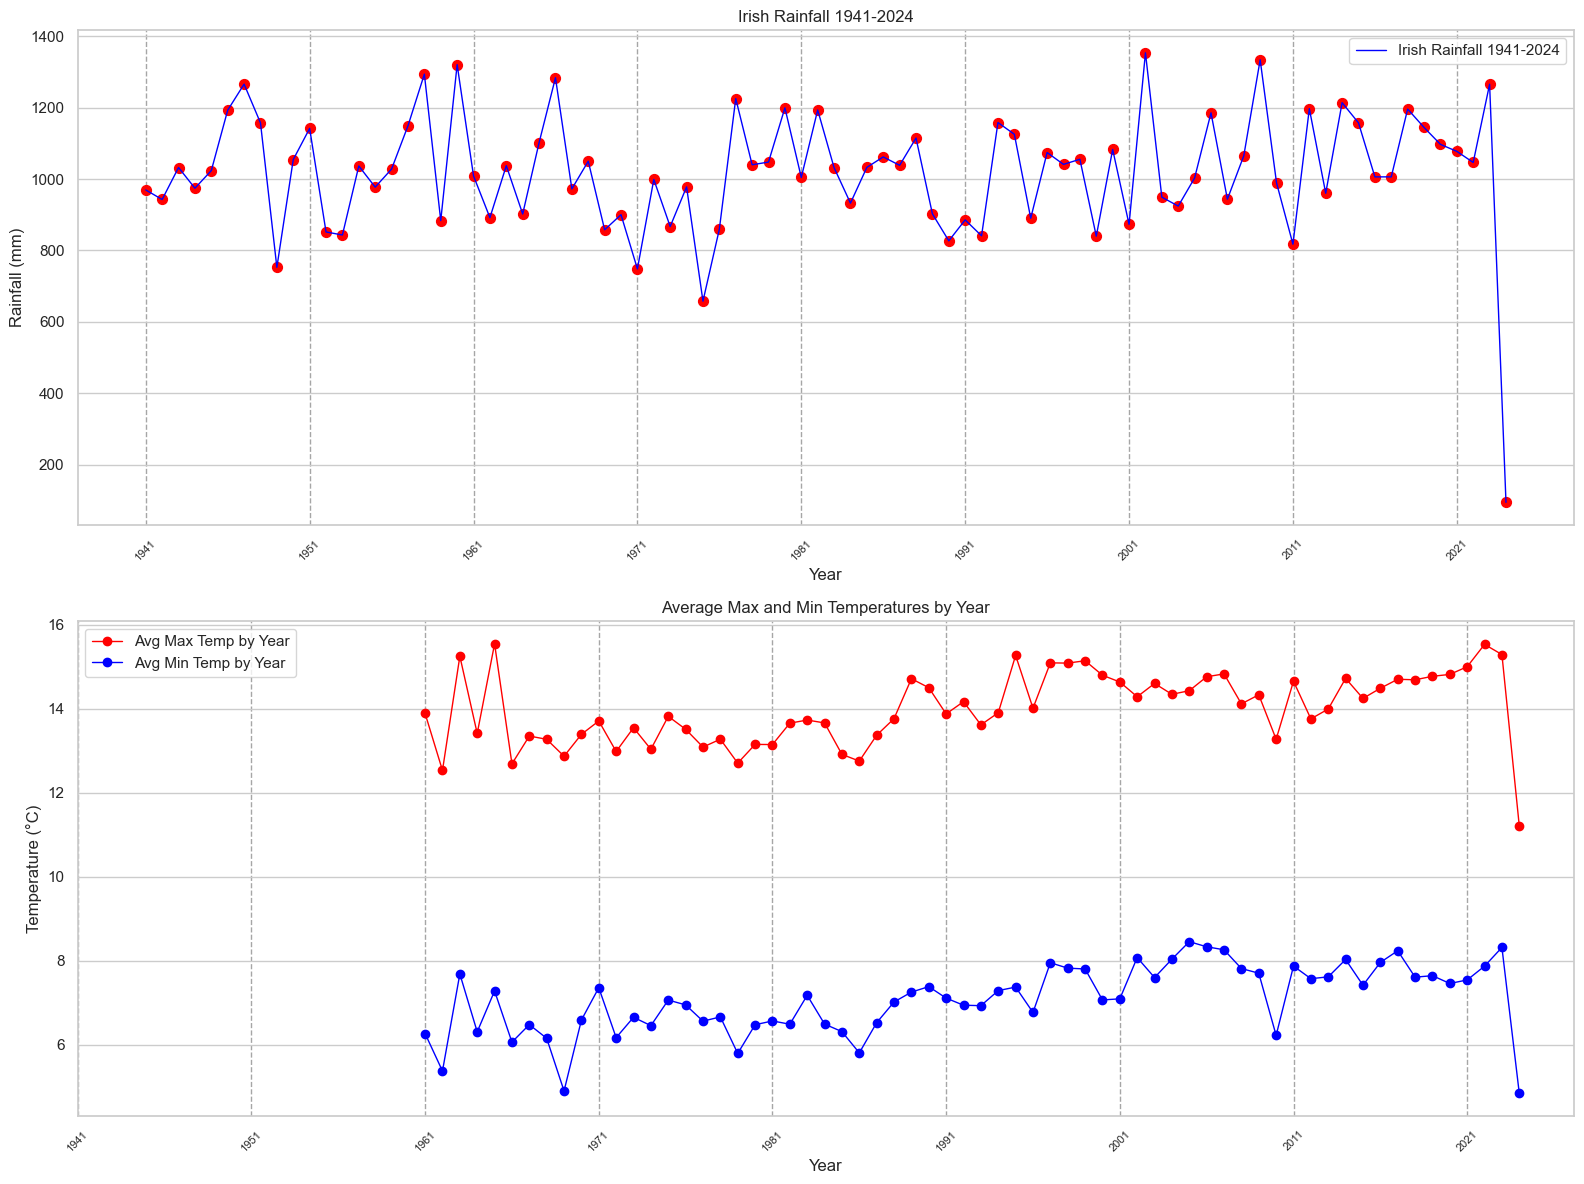

In [2776]:
# Step 1: Filter years for every decade (years ending in 0) for rainfall
decade_ticks = np.arange(yearlyrainfall["year"].min(), yearlyrainfall["year"].max() + 1, 10)

# Step 2: Create subplots 35
fig, ax1 = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: Rainfall data
ax1[0].plot(yearlyrainfall["year"], yearlyrainfall["rain"], label="Irish Rainfall 1941-2024", color="blue", linewidth=1)
ax1[0].scatter(yearlyrainfall["year"], yearlyrainfall["rain"], color="red", edgecolor="red", s=50, marker="o")
ax1[0].set_xticks(decade_ticks)
ax1[0].set_xticklabels(decade_ticks, rotation=45, fontsize=8)
ax1[0].set_xlabel("Year")
ax1[0].set_ylabel("Rainfall (mm)")
ax1[0].set_title("Irish Rainfall 1941-2024")
ax1[0].grid(axis="x", linestyle="--", color="gray", alpha=0.7)
ax1[0].legend()

# Plot 2: Temperature data
ax1[1].plot(yearly_avg1["year"], yearly_avg1["maxt"], label="Avg Max Temp by Year", color="r", marker="o", linewidth=1)
ax1[1].plot(yearly_avg1["year"], yearly_avg1["mint"], label="Avg Min Temp by Year", color="b", marker="o", linewidth=1)
ax1[1].set_xticks(decade_ticks)
ax1[1].set_xticklabels(decade_ticks, rotation=45, fontsize=8)
ax1[1].set_xlabel("Year")
ax1[1].set_ylabel("Temperature (°C)")
ax1[1].set_title("Average Max and Min Temperatures by Year")
ax1[1].grid(axis="x", linestyle="--", color="gray", alpha=0.7)
ax1[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# show/save plot
os.makedirs(jpg_path, exist_ok=True)

image_path = os.path.join(jpg_path, "irishrainfall_v_temp_1961-2024.jpg")
plt.savefig(image_path)
plt.show()
plt.show()

### Trends

/var/folders/bn/xqdgg_35477_8nvxrj84pj300000gn/T/ipykernel_76848/3853253480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globaldata_cleaned.loc[:, "temp_ma"] = globaldata_cleaned["tempvalues"].rolling(window=window_size).mean()
/var/folders/bn/xqdgg_35477_8nvxrj84pj300000gn/T/ipykernel_76848/3853253480.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globaldata_cleaned.loc[:, "co2_ma"] = globaldata_cleaned["co2values"].rolling(window=window_size).mean()
/var/folders/bn/xqdgg_35477_8nvxrj84pj300000

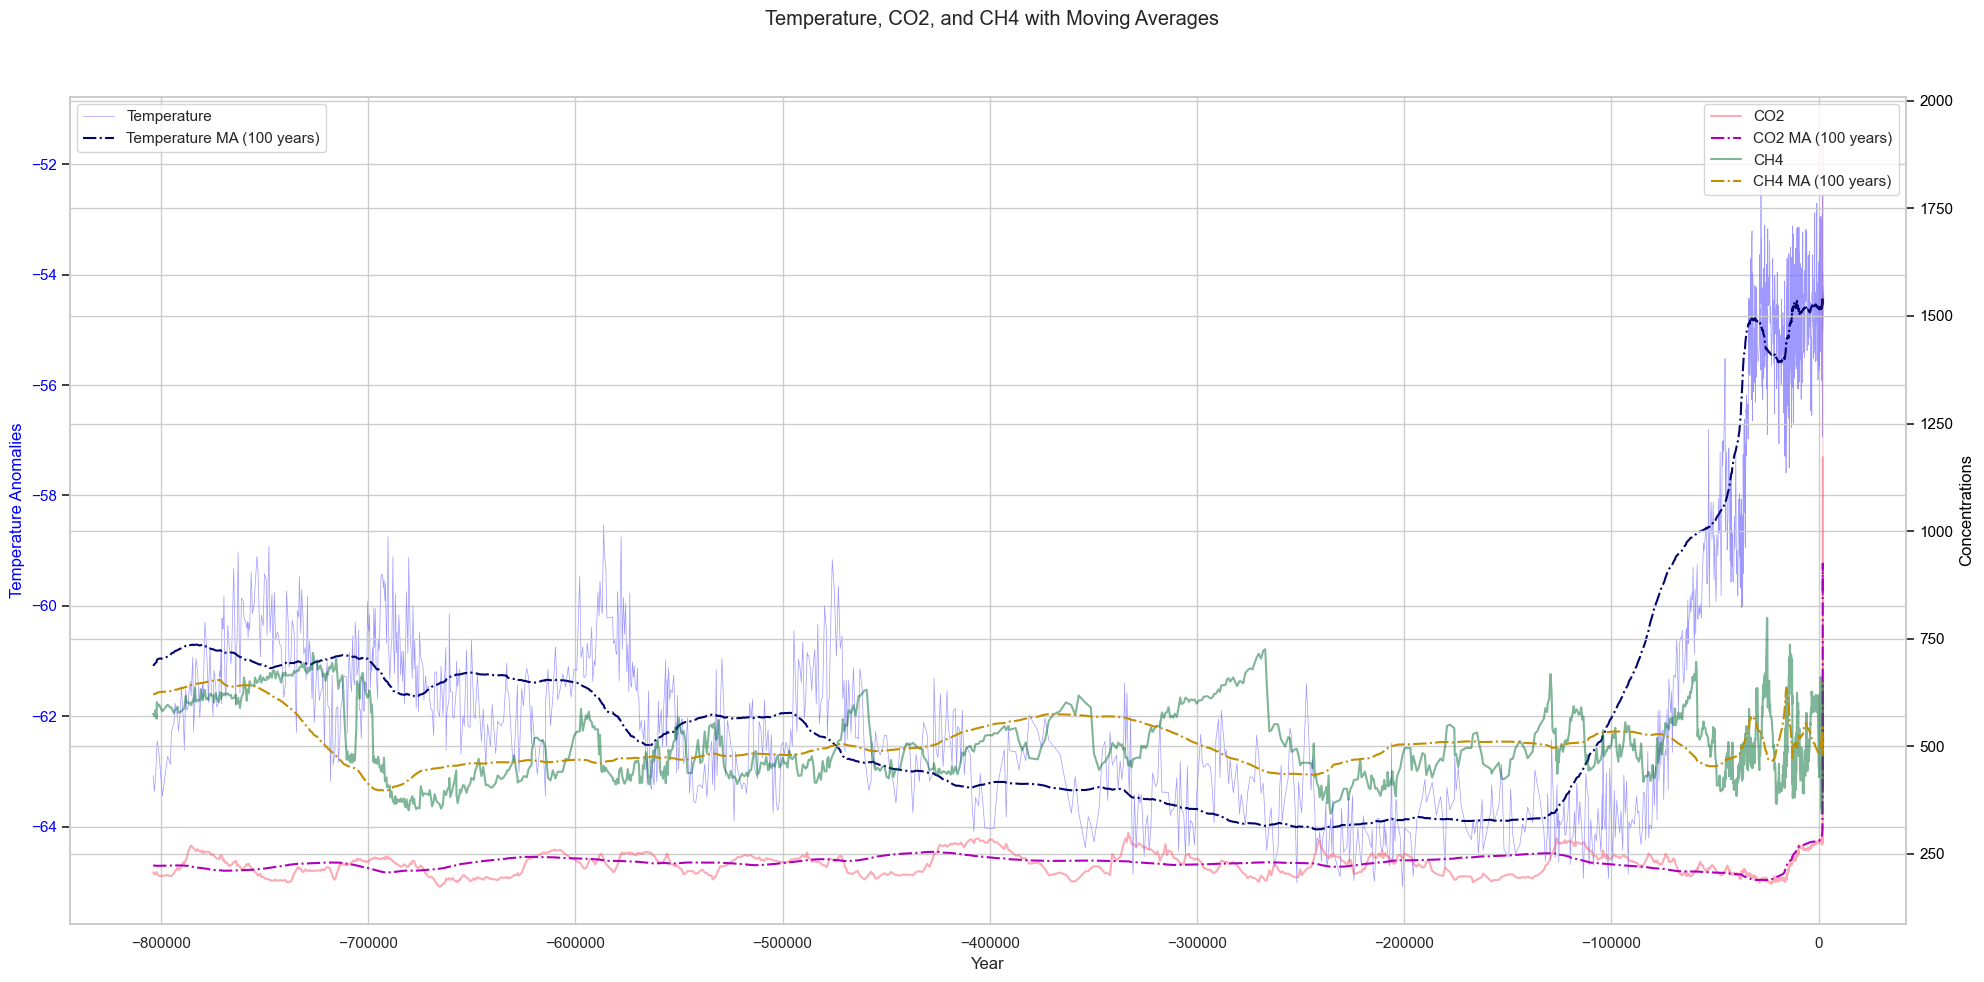

In [2777]:
# moving averages and trends

# calculate moving averages - 100year blocks
window_size = 100
globaldata_cleaned.loc[:, "temp_ma"] = globaldata_cleaned["tempvalues"].rolling(window=window_size).mean()
globaldata_cleaned.loc[:, "co2_ma"] = globaldata_cleaned["co2values"].rolling(window=window_size).mean()
globaldata_cleaned.loc[:, "ch4_ma"] = globaldata_cleaned["ch4values"].rolling(window=window_size).mean()


fig, ax1 = plt.subplots(figsize=(20, 10))

# moving average
sns.lineplot(x="years", y="tempvalues", data=globaldata_cleaned, ax=ax1, label="Temperature", color="#7F76FF", alpha=0.75, linewidth=0.5,)
sns.lineplot(x="years", y="temp_ma", data=globaldata_cleaned, ax=ax1, label=f"Temperature MA ({window_size} years)", color="#00046C", linestyle="dashdot")

# CO2 and CH4 with moving averages on twin axis plots
ax2 = ax1.twinx()
sns.lineplot(x="years", y="co2values", data=globaldata_cleaned, ax=ax2, label="CO2", color="#F7596E", alpha=0.5)
sns.lineplot(x="years", y="co2_ma", data=globaldata_cleaned, ax=ax2, label=f"CO2 MA ({window_size} years)", color="#AE00BA", linestyle="dashdot")
sns.lineplot(x="years", y="ch4values", data=globaldata_cleaned, ax=ax2, label="CH4", color="#006C32", alpha=0.5)
sns.lineplot(x="years", y="ch4_ma", data=globaldata_cleaned, ax=ax2, label=f"CH4 MA ({window_size} years)", color="#C18E00", linestyle="dashdot")

# setting labels and titles
ax1.set_xlabel("Year")
ax1.set_ylabel("Temperature Anomalies", color="b")
ax1.tick_params(axis="y", labelcolor="b")
ax2.set_ylabel("Concentrations", color="k")
ax2.tick_params(axis="y", labelcolor="k")
fig.suptitle("Temperature, CO2, and CH4 with Moving Averages")

# adding legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines, labels, loc="upper left")
ax2.legend(lines2, labels2, loc="upper right")

# layout
fig.tight_layout(rect=[0, 0, 1, 0.95])  

# show/save plot
os.makedirs(jpg_path, exist_ok=True)

image_path = os.path.join(jpg_path, "temperature_co2_ch4_moving_averages.jpg")
plt.savefig(image_path)
plt.show()

The above graph depicts the long-term changes in temperatures, CO2, and CH4 levels using 100-year averages to enhance the clarity of the trends. 

Both solid lines for C02 and CH4 show upward trends towards the present day, signifying higher gas concentrations. Averages are utilized here to smooth out the lines (see dashed lines), emphasizing long-term trends as there is a lot of data between 8kyr to present(2023).

The averages demonstrate the increase in CO2 and CH4 levels, particularly in recent times. Additionally, the graph reveals substantial fluctuations in temperature and gas levels over extensive periods. Towards the right-hand side of the graph, there is a sharp increase in both temperature and gas levels, likely attributed to human activities and historical advancements in industry and technology causing more emmisions.

### Irish Climate V Global Climate



---

<a id="03i">

## Predictions

</a>

### Synthetic Data ML Modelling - Linear Regression for C02

   year      co2      ch4   temp
0  2023  1922.39  1922.39 -54.31
1  2022  1911.82  1911.82 -54.15
2  2021  1895.26  1895.26 -54.43
3  2020  1878.93  1878.93 -54.06
4  2019  1866.58  1866.58 -54.24


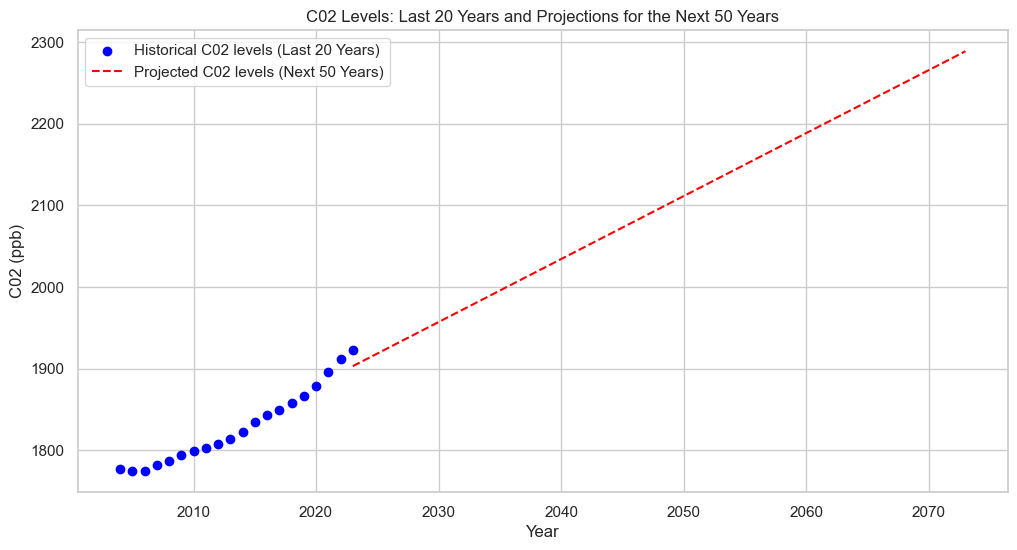

In [2778]:
# Load the dataset
data = pd.read_csv("DATA Files/finaldataframe.csv")

# Inspect the first few rows
print(data.head())

# Filter data for the last 20 years
end_year = data["year"].max()
start_year = end_year - 19  # Include the last 20 years
filtered_data = data[data["year"] >= start_year]

# Drop rows with NaN values in "co2" or "year"
filtered_data = filtered_data.dropna(subset=["co2", "year"])

# Reshape/transpose data for linear regression
C02_years = filtered_data["year"].to_numpy().reshape(-1, 1) #36
C02_level = filtered_data["co2"].to_numpy().reshape(-1, 1)

# Linear regression model
lr = LinearRegression()
lr.fit(C02_years, C02_level)

# Predict future C02 levels for the next 50 years
x_test = np.linspace(end_year, end_year + 50, 50)
x_test_reshaped = x_test.reshape(-1, 1)
y_test_pred = lr.predict(x_test_reshaped)

# Plot the graph
plt.figure(figsize=(12, 6))
plt.scatter(C02_years, C02_level, color="blue", label="Historical C02 levels (Last 20 Years)")
plt.plot(x_test, y_test_pred, color="red", linestyle="--", label="Projected C02 levels (Next 50 Years)")

plt.xlabel("Year")
plt.ylabel("C02 (ppb)")
plt.title("C02 Levels: Last 20 Years and Projections for the Next 50 Years")
plt.legend()
plt.grid(True)

# show/save plot
os.makedirs(jpg_path, exist_ok=True)

image_path = os.path.join(jpg_path, "co2predictions.jpg")
plt.savefig(image_path)
plt.show()

### Synthetic Data ML Modelling - Linear Regression for CH4

   year      co2      ch4   temp
0  2023  1922.39  1922.39 -54.31
1  2022  1911.82  1911.82 -54.15
2  2021  1895.26  1895.26 -54.43
3  2020  1878.93  1878.93 -54.06
4  2019  1866.58  1866.58 -54.24


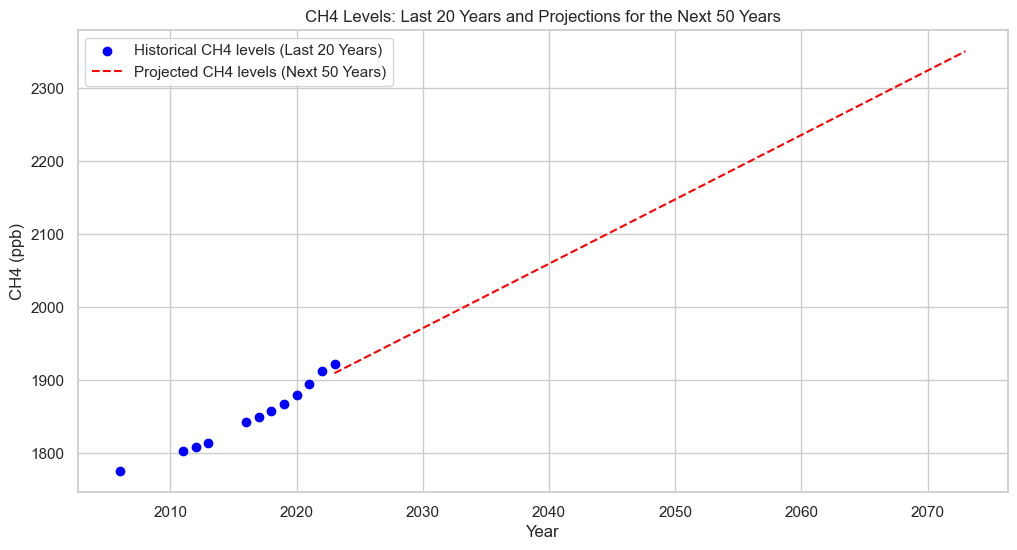

In [2779]:
# Load the dataset
data = pd.read_csv("DATA Files/finaldataframe.csv")

# Inspect the first few rows
print(data.head())

# Filter data for the last 20 years
end_year = data["year"].max()
start_year = end_year - 19  # Include the last 20 years
filtered_data = data[data["year"] >= start_year]

# Drop rows with NaN values in "ch4" or "year"
filtered_data = filtered_data.dropna(subset=["ch4", "year"])

# Reshape/transpose data for linear regression
CH4_years = filtered_data["year"].to_numpy().reshape(-1, 1)
CH4_level = filtered_data["ch4"].to_numpy().reshape(-1, 1)

# Linear regression model
lr = LinearRegression()
lr.fit(CH4_years, CH4_level)

# Predict future CH4 levels for the next 50 years
x_test = np.linspace(end_year, end_year + 50, 50)
x_test_reshaped = x_test.reshape(-1, 1)
y_test_pred = lr.predict(x_test_reshaped)

# Plot the graph
plt.figure(figsize=(12, 6))
plt.scatter(CH4_years, CH4_level, color="blue", label="Historical CH4 levels (Last 20 Years)")
plt.plot(x_test, y_test_pred, color="red", linestyle="--", label="Projected CH4 levels (Next 50 Years)")

plt.xlabel("Year")
plt.ylabel("CH4 (ppb)")
plt.title("CH4 Levels: Last 20 Years and Projections for the Next 50 Years")
plt.legend()
plt.grid(True)

# show/save plot
os.makedirs(jpg_path, exist_ok=True)

image_path = os.path.join(jpg_path, "ch4predictions.jpg")
plt.savefig(image_path)
plt.show()

In the above two graphs, the linear regression models take the historical information sourced previously and predict that both the co2 and ch4 emissions will continue to rise quickly as it has in the last 20 years and more. Although it is fairly accurate to say this may be the case in the years to come, the linear prediciton is quite simple and does not take into account the complexities of climate and cannot predict future scenarios that can influence whether the emission levels might accelarate or decelerate.



---

<a id="07i">

## REFERENCES

</a>


1. MyST Markdown. (2022). Mystmd.org. [online] doi:https://doi.org/10.5281/ZENODO.6476040.
2. Frost, J. (2018). Measures of central tendency: Mean, median, and mode. [online] Statistics by Jim. Available at: https://statisticsbyjim.com/basics/measures-central-tendency-mean-median-mode/.
3. GeeksforGeeks (2024). How To Calculate Summary Statistics In Pandas. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/how-to-calculate-summary-statistics-in-pandas/ 
4. GeeksforGeeks. (2019). Python | os.makedirs() method. [online] Available at: https://www.geeksforgeeks.org/python-os-makedirs-method/.
5. GeeksforGeeks. (2020). StringIO Module in Python. [online] Available at: https://www.geeksforgeeks.org/stringio-module-in-python/.
6. Iguazio. (2024). What is Baseline Models | Iguazio. [online] Available at: https://www.iguazio.com/glossary/baseline-models/#:~:text=A%20baseline%20serves%20as%20a 
7. matplotlib.org. - Getting started — Matplotlib 3.6.2 documentation. [online] Available at: https://matplotlib.org/stable/users/getting_started/.matplotlib.org. 
8. (n.d.). matplotlib.pyplot.subplots — Matplotlib 3.6.0 documentation. [online] Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html.
9. Met Eireann (2019). Historical Data - Met Éireann - The Irish Meteorological Service. [online] Www.met.ie. Available at: https://www.met.ie/climate/available-data/historical-data.
10. Mozilla (2023). HTTP Response Status Codes. [online] MDN Web Docs. Available at: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status.
11. NOAA (2019). National Centers for Environmental Information (NCEI). [online] Noaa.gov. Available at: https://www.ncei.noaa.gov/.Noaa.gov. 
12. NOAA (2012). Available at: https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt.
13. Noaa.gov. (2014). Climate at a Glance. [online] Available at: https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/antarctic/land_ocean/12/11/1850-2023/data.csv 
14. Numpy.org. (2009). NumPy — NumPy. [online] Available at: https://numpy.org.numpy.org. 
15. Numpy.org. (2009). numpy.reshape — NumPy v1.20 Manual. [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html.numpy.org. 
16. Numpy.org. (2009). numpy.shape — NumPy v1.24 Manual. [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.shape.html.pandas 
17. (2023). pandas.DataFrame — pandas 1.2.4 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html.pandas.pydata.org. 
18. pandas. API reference — pandas 1.5.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/.pandas.pydata.org. 
19. pandas. Merge, join, concatenate and compare — pandas 1.2.4 documentation. [online] Available at: https://pandas.pydata.org/docs/user_guide/merging.html.pandas.pydata.org. 
20. pandas. pandas.DataFrame.agg — pandas 2.0.0 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html.pandas.pydata.org. 
21. pandas. pandas.DataFrame.astype — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html.pandas.pydata.org. 
22. pandas. pandas.DataFrame.columns — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html.pandas.pydata.org. 
23. pandas. pandas.DataFrame.describe — pandas 1.3.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html.pandas.pydata.org. 
24. pandas. pandas.DataFrame.dropna — pandas 1.3.1 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html.pandas.pydata.org. 
25. pandas. pandas.DataFrame.head — pandas 1.0.3 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html.pandas.pydata.org. 
26. pandas. pandas.DataFrame.iloc — pandas 1.3.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html.pandas.pydata.org. 
27. pandas. pandas.DataFrame.reset_index — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html.pandas.pydata.org. 
28. pandas. pandas.DataFrame.tail — pandas 1.5.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html.pandas.pydata.org. 
29. pandas. pandas.to_datetime — pandas 1.3.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html.Pydata.org. 
30. (2019). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Available at: https://pandas.pydata.org.Pydata.org. (2024). 
31. pandas.read_fwf — pandas 2.2.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.read_fwf.html 
32. Python (2019). os — Miscellaneous operating system interfaces — Python 3.8.0 documentation. [online] Python.org. Available at: https://docs.python.org/3/library/os.html.
33. Reitz, K. (2023). requests: Python HTTP for Humans. [online] PyPI. Available at: https://pypi.org/project/requests/.requests.readthedocs.io. 
34. scikitlearn. Quickstart — Requests 2.28.2 documentation. [online] Available at: https://requests.readthedocs.io/en/latest/user/quickstart/.
35. scikit-learn developers (2019). sklearn.linear_model.LinearRegression — scikit-learn 0.22 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.seaborn.pydata.org. 
36. An introduction to seaborn — seaborn 0.12.1 documentation. [online] Available at: https://seaborn.pydata.org/tutorial/introduction.html.
37. US Department of Commerce, N. NOAA ESRL Global Monitoring Laboratory. [online] gml.noaa.gov. Available at: https://gml.noaa.gov.